# Part 2, Lab #5: Image Segmentation

Ke Xu 3190110360

### Due April 28th, 2023 11:59 PM CST
#### Logistics and Lab Submission
See the **BlackBoard**.
#### What You Will Need To Know For This Lab

This lab covers:

- Image Segmentation using K-Means.
- Background Subtraction.

The submission procedure is provided below:
- You will be provided with a Jupyter Notebook for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. 
- Upload the **PDF** (screen shot) file of your Jupyter Notebook (.ipynb file).
- Your grades and feedbacks will appear on BlackBoard. You will have a chance to re-submit your code, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).

# Problem 1: Image Segmentation using K-means
1. Importing the libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

root_path = '/Users/xuke/Desktop/lab5_part2' # please input your root path
im =  cv2.imread('{}/elephant.jpg'.format(root_path)) # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


2. K-means clustering, suppose the number of clusters is 4, please fullfill this function. You can refer from [this link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [2]:
from sklearn.cluster import KMeans

# Flatten Each channel of the Image
all_pixels  = im.reshape(-1,im.shape[-1])
print('all_pixels shape is:', all_pixels.shape)

# K-means
km = KMeans(algorithm='auto',copy_x=True, init='k-means++', max_iter=300, n_clusters=4, 
            n_init=10, random_state=None, tol=0.0001, verbose=0)
km.fit(all_pixels)

all_pixels shape is: (165000, 3)


KMeans(n_clusters=4)

__Please note that, parameters 'n_jobs' and 'precompute_distances' are omitted due to the warnings below:__

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"

3. Print the cluster center and convert to Integer format.

In [3]:
centers = km.cluster_centers_
print(centers)

[[ 37.95984119  35.23062478  64.42122488]
 [174.73914956 145.22706209 128.26355225]
 [ 98.53372841  94.7141551  117.78049441]
 [  1.49597475   0.83632573   1.15406   ]]


In [4]:
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 37  35  64]
 [174 145 128]
 [ 98  94 117]
 [  1   0   1]]


4. Plot what all colors are these ? 

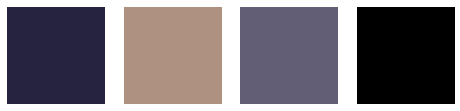

In [5]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array by centers
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

5. Segmenting our original image. You should create a blank image with the same shape of the origin image. Then use **colors** and **K-means labels** to fullfill the new image.

In [6]:
new_img = np.zeros((165000, 3),dtype='uint8') # please input the size of the image
print(new_img.shape)

(165000, 3)


In [7]:
print(colors)
print(km.labels_)

[array([37, 35, 64], dtype=uint8), array([174, 145, 128], dtype=uint8), array([ 98,  94, 117], dtype=uint8), array([1, 0, 1], dtype=uint8)]
[0 0 0 ... 3 3 3]


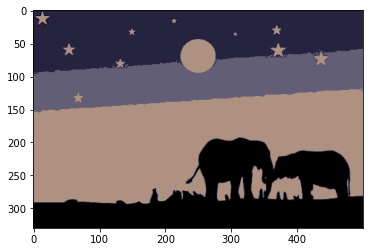

In [8]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    # fullfill the function
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

# Problem 2: Background Subtraction
We will familiarize with the background subtraction methods available in OpenCV.

BackgroundSubtractorMOG, you can refer from [this link](https://docs.opencv.org/3.4/d7/d7b/classcv_1_1BackgroundSubtractorMOG2.html).

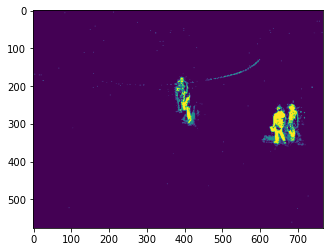

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

cap = cv2.VideoCapture('vtest.avi')
# Please design the function by using cv2.createBackgroundSubtractorMOG2()

fgbg =  cv2.createBackgroundSubtractorMOG2()

i = 0
while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame) # Please fullfill this function
     
    i+=1
    if i == 30:
        cv2.imwrite('MOG.jpg', fgmask)
        break

img=Image.open('MOG.jpg')
plt.imshow(img)
plt.show()